In [11]:
# !pip install nuscenes-devkit==1.1.9 &> /dev/null  # Install nuScenes.

In [8]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version="v1.0-test", dataroot="./data/nuScenes" , verbose=True)

Loading NuScenes tables for version v1.0-test...
0 category,
0 attribute,
0 visibility,
0 instance,
12 sensor,
12 calibrated_sensor,
1 ego_pose,
1 log,
1 scene,
41 sample,
10516 sample_data,
0 sample_annotation,
1 map,
Done loading in 0.027 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.


In [9]:
#データセット内に含まれる全シーンの一覧を取得する
nusc.list_scenes()

scene_1, Evaluation scene [70-01-01 00:00:06]   20s, eval, #anns:0


{'token': '23e52908-e94e-431d-a3cb-d32358ff90b4', 'name': 'scene_1', 'description': 'Evaluation scene', 'log_token': '5d6caf41-1ab6-46b8-933b-b7227e6d890d', 'nbr_samples': 41, 'first_sample_token': '34c631ca-c739-4bdd-9af2-9c3567a6eda7', 'last_sample_token': '8a969d7a-9d33-4634-b869-52bcc0136cde'}
34c631ca-c739-4bdd-9af2-9c3567a6eda7


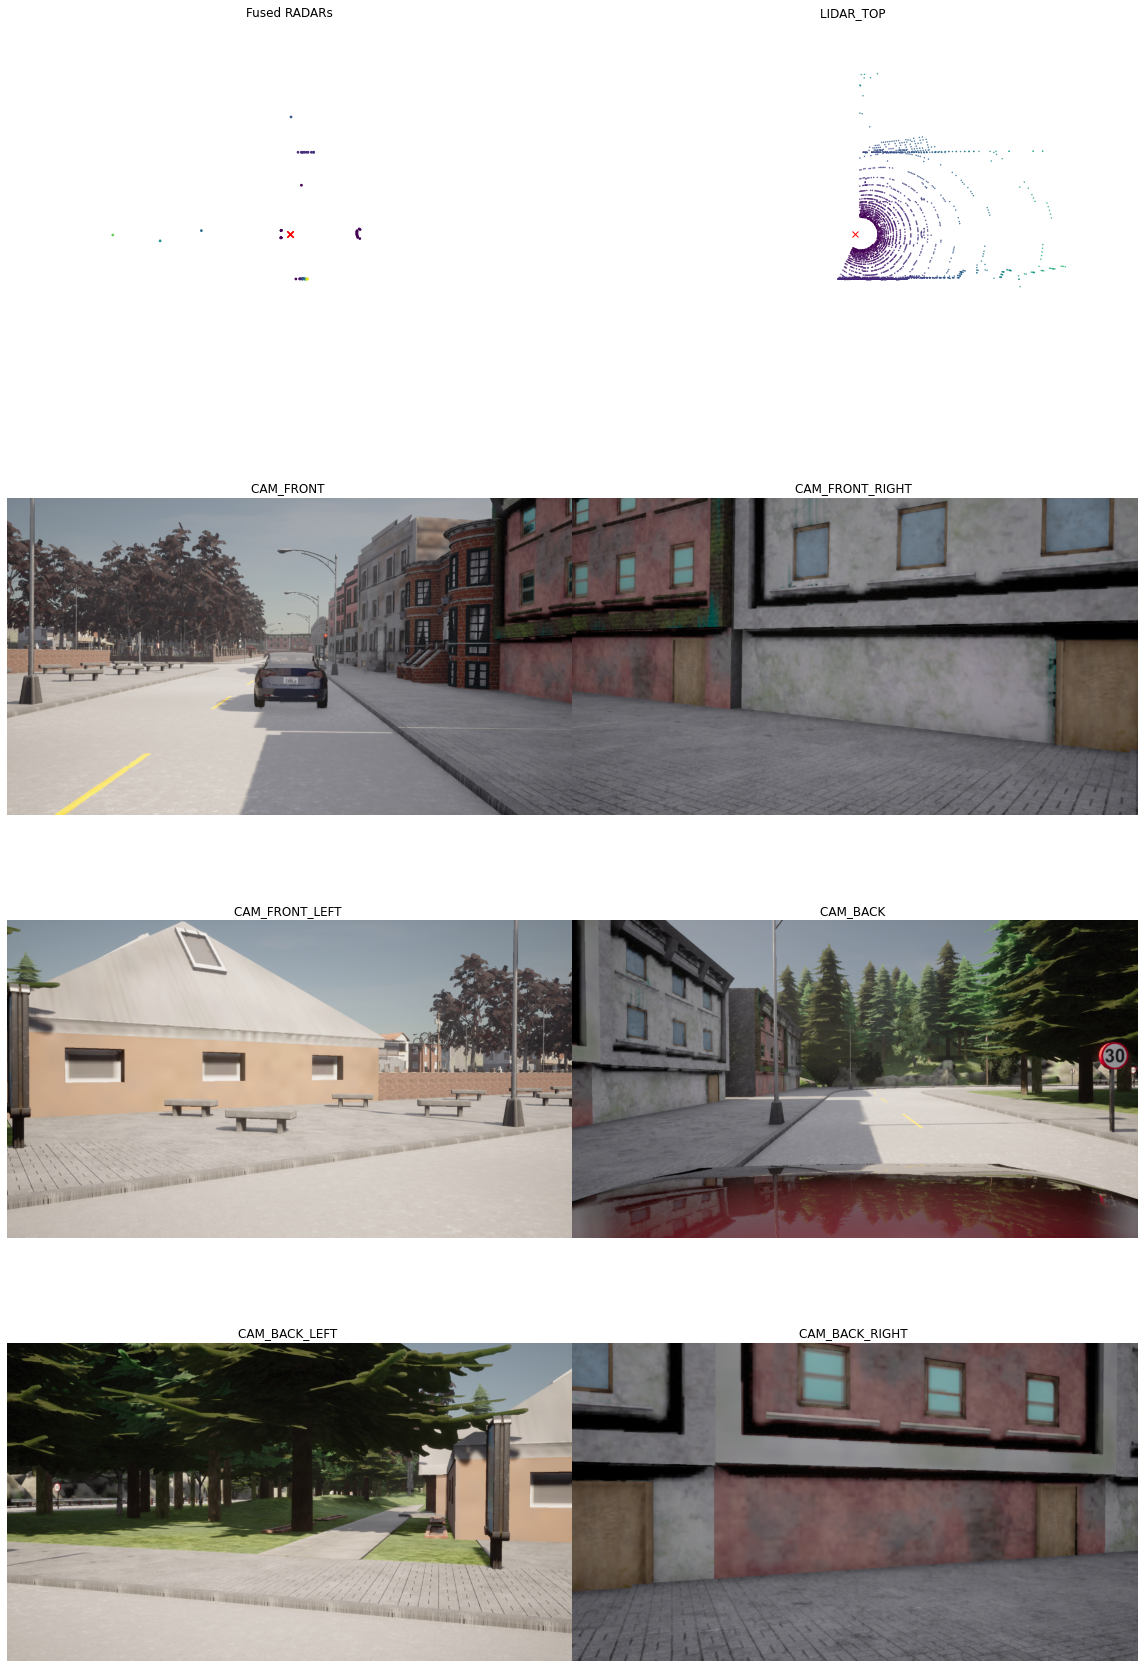

In [10]:
# 最初のシーンを取得
scene = nusc.scene[0]
print(scene)

# 最初の sample_token を取得
first_sample_token = scene['first_sample_token']
print(first_sample_token)
# from nuscenes.utils.data_classes import RadarPointCloud
# RadarPointCloud.disable_filters()   # これで ambig_state や dynprop のフィルタを全部OFF

# sample を可視化（画像 or LiDAR にバウンディングボックス付き）
nusc.render_sample(first_sample_token)


In [136]:
my_sample = nusc.get('sample', first_sample_token)
print(my_sample)

{'token': '7973668b-b37a-4bf0-abd6-4c1103ae2d86', 'scene_token': 'b0abd6cb-9357-4eab-afa8-e8d0537a47f2', 'prev': '', 'next': 'b86ed3f7-7b0f-4e44-9114-3e3147fdac19', 'timestamp': 2690025, 'data': {'CAM_FRONT': '655fa016-bb82-4360-8729-72863f42639d', 'CAM_FRONT_RIGHT': 'e80db320-9225-40d1-ab93-1b79d8022515', 'CAM_FRONT_LEFT': 'ee5588c7-5424-41c4-90e6-bec68460993c', 'CAM_BACK': '7df57775-0265-4557-8ebd-e5d7e82c6a8a', 'CAM_BACK_LEFT': '9ca6e72e-57fd-4287-894f-d0c420df8681', 'CAM_BACK_RIGHT': 'ff84b231-adcf-4bcf-b735-914a245dad3a', 'RADAR_FRONT': 'c7833dd3-8311-454d-bbec-11f93f2d6d99', 'RADAR_FRONT_LEFT': 'a50440d0-a52c-4c8f-9578-0b0cb35fce58', 'RADAR_FRONT_RIGHT': '2ccd9882-ae8b-42ba-8618-dd9c85800941', 'RADAR_BACK_LEFT': 'fc1298a5-ac29-4b05-acfe-29a08544723c', 'RADAR_BACK_RIGHT': '1db6e5c9-af8b-4b23-9703-f01213d684c6', 'LIDAR_TOP': '6b60e57a-e839-404e-9908-f7a15c3fb60e'}, 'anns': []}


In [137]:
# 指定した サンプル（1フレーム） に含まれる 全てのセンサーデータ（sample_data） を一覧表示する
# どのセンサで撮像されたものか、どういったアノテーション情報が含まれているか
nusc.list_sample(my_sample['token'])

Sample: 7973668b-b37a-4bf0-abd6-4c1103ae2d86

sample_data_token: 655fa016-bb82-4360-8729-72863f42639d, mod: camera, channel: CAM_FRONT
sample_data_token: e80db320-9225-40d1-ab93-1b79d8022515, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: ee5588c7-5424-41c4-90e6-bec68460993c, mod: camera, channel: CAM_FRONT_LEFT
sample_data_token: 7df57775-0265-4557-8ebd-e5d7e82c6a8a, mod: camera, channel: CAM_BACK
sample_data_token: 9ca6e72e-57fd-4287-894f-d0c420df8681, mod: camera, channel: CAM_BACK_LEFT
sample_data_token: ff84b231-adcf-4bcf-b735-914a245dad3a, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: c7833dd3-8311-454d-bbec-11f93f2d6d99, mod: radar, channel: RADAR_FRONT
sample_data_token: a50440d0-a52c-4c8f-9578-0b0cb35fce58, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: 2ccd9882-ae8b-42ba-8618-dd9c85800941, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: fc1298a5-ac29-4b05-acfe-29a08544723c, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: 1db6e5c

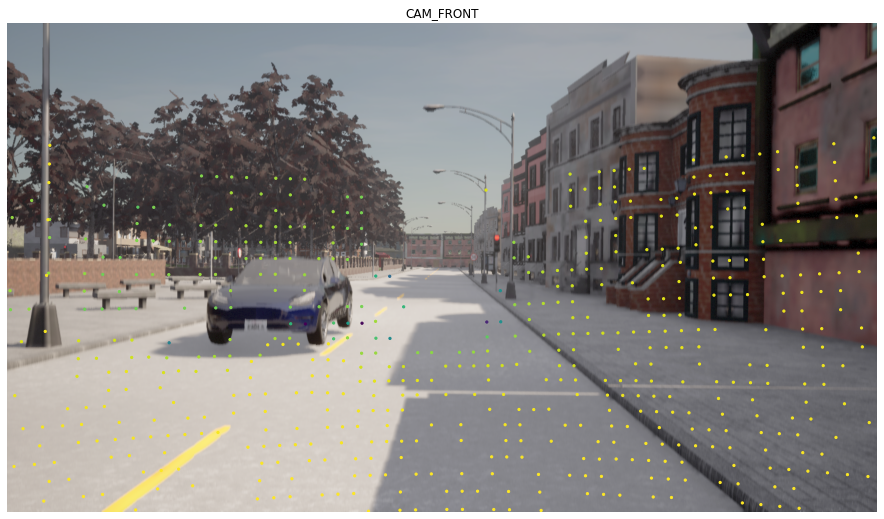

In [138]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
nusc.explorer.render_pointcloud_in_image(
    my_sample['token'],
    pointsensor_channel='LIDAR_TOP',
    camera_channel='CAM_FRONT',     # 必要なら別CAMに
    render_intensity=True,
    ax=ax                           # ここで渡す
)
plt.show()
